In [1]:
import pandas as pd
df = pd.read_excel("perolabolard.xlsx")
df = df.iloc[:, :-1]
df.head()

,Tempo,FORÇA
0,s,Kg
1,0,0.052203
2,0.05,0.0335
3,0.1,0.0335
4,0.15,0.052203


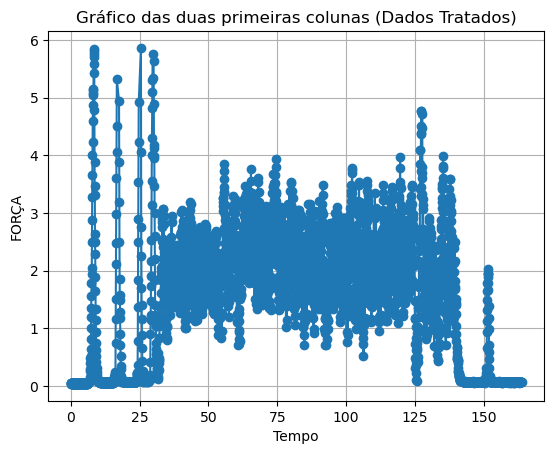

In [2]:

import matplotlib.pyplot as plt


# 2. Remover linhas com valores nulos
df = df.dropna()

# 3. Verificar e converter para numérico, caso alguma coluna tenha sido carregada como texto
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')

# Remover novamente valores nulos, caso a conversão tenha gerado NaNs
df = df.dropna()

# 4. Filtrar outliers usando o intervalo interquartil (IQR), se necessário
Q1 = df[df.columns[1]].quantile(0.25)
Q3 = df[df.columns[1]].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[df.columns[1]] >= (Q1 - 1.5 * IQR)) & (df[df.columns[1]] <= (Q3 + 1.5 * IQR))]

# 5. Gerar o gráfico com os dados tratados
plt.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Gráfico das duas primeiras colunas (Dados Tratados)')
plt.grid()
plt.show()



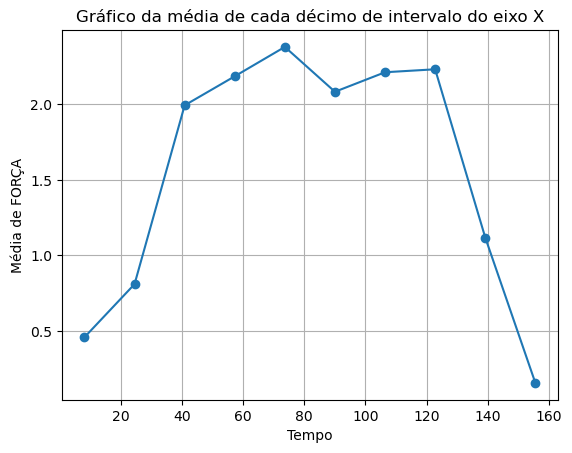

In [3]:
import numpy as np
# Definir o eixo X e o eixo Y
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Definir os limites do eixo X e criar 10 intervalos
x_min, x_max = x.min(), x.max()
intervalos = np.linspace(x_min, x_max, 11)

# Calcular a média de Y em cada intervalo de X
medias_y = []
centros_x = []

for i in range(len(intervalos) - 1):
    # Filtrar dados que estão dentro do intervalo atual
    mask = (x >= intervalos[i]) & (x < intervalos[i + 1])
    # Calcular a média do eixo Y para o intervalo atual
    media_y = y[mask].mean()
    # Adicionar a média e o centro do intervalo
    medias_y.append(media_y)
    centros_x.append((intervalos[i] + intervalos[i + 1]) / 2)

# Plotar o gráfico das médias
plt.plot(centros_x, medias_y, marker='o', linestyle='-')
plt.xlabel(df.columns[0])
plt.ylabel(f"Média de {df.columns[1]}")
plt.title('Gráfico da média de cada décimo de intervalo do eixo X')
plt.grid()
plt.show()

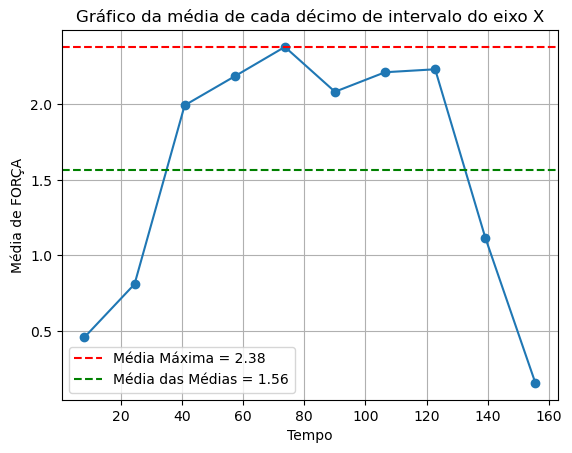

In [4]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Definir os limites do eixo X e criar 10 intervalos
x_min, x_max = x.min(), x.max()
intervalos = np.linspace(x_min, x_max, 11)

# Calcular a média de Y em cada intervalo de X
medias_y = []
centros_x = []

for i in range(len(intervalos) - 1):
    # Filtrar dados que estão dentro do intervalo atual
    mask = (x >= intervalos[i]) & (x < intervalos[i + 1])
    # Calcular a média do eixo Y para o intervalo atual
    media_y = y[mask].mean()
    # Adicionar a média e o centro do intervalo
    medias_y.append(media_y)
    centros_x.append((intervalos[i] + intervalos[i + 1]) / 2)

# Calcular a média máxima e a média das médias
media_maxima = max(medias_y)
media_das_medias = np.mean(medias_y)

# Plotar o gráfico das médias
plt.plot(centros_x, medias_y, marker='o', linestyle='-')
plt.xlabel(df.columns[0])
plt.ylabel(f"Média de {df.columns[1]}")
plt.title('Gráfico da média de cada décimo de intervalo do eixo X')
plt.grid()

# Anotar a média máxima e a média das médias no gráfico
plt.axhline(y=media_maxima, color='r', linestyle='--', label=f'Média Máxima = {media_maxima:.2f}')
plt.axhline(y=media_das_medias, color='g', linestyle='--', label=f'Média das Médias = {media_das_medias:.2f}')

# Adicionar legenda
plt.legend()

plt.show()

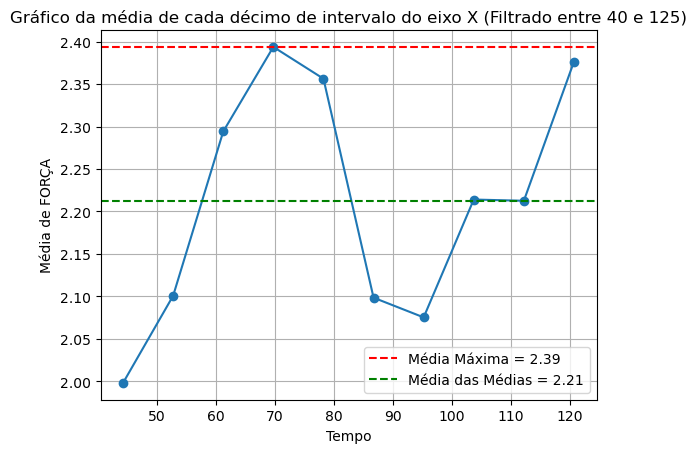

In [5]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Filtrar os dados para valores de x entre 40 e 125
mask = (x > 40) & (x < 125)
x = x[mask]
y = y[mask]

# Definir os limites do eixo X e criar 10 intervalos
x_min, x_max = x.min(), x.max()
intervalos = np.linspace(x_min, x_max, 11)

# Calcular a média de Y em cada intervalo de X
medias_y = []
centros_x = []

for i in range(len(intervalos) - 1):
    # Filtrar dados que estão dentro do intervalo atual
    mask = (x >= intervalos[i]) & (x < intervalos[i + 1])
    # Calcular a média do eixo Y para o intervalo atual
    media_y = y[mask].mean()
    # Adicionar a média e o centro do intervalo
    medias_y.append(media_y)
    centros_x.append((intervalos[i] + intervalos[i + 1]) / 2)

# Calcular a média máxima e a média das médias
media_maxima = max(medias_y)
media_das_medias = np.mean(medias_y)

# Plotar o gráfico das médias
plt.plot(centros_x, medias_y, marker='o', linestyle='-')
plt.xlabel(df.columns[0])
plt.ylabel(f"Média de {df.columns[1]}")
plt.title('Gráfico da média de cada décimo de intervalo do eixo X (Filtrado entre 40 e 125)')
plt.grid()

# Anotar a média máxima e a média das médias no gráfico
plt.axhline(y=media_maxima, color='r', linestyle='--', label=f'Média Máxima = {media_maxima:.2f}')
plt.axhline(y=media_das_medias, color='g', linestyle='--', label=f'Média das Médias = {media_das_medias:.2f}')

# Adicionar legenda
plt.legend()

plt.show()

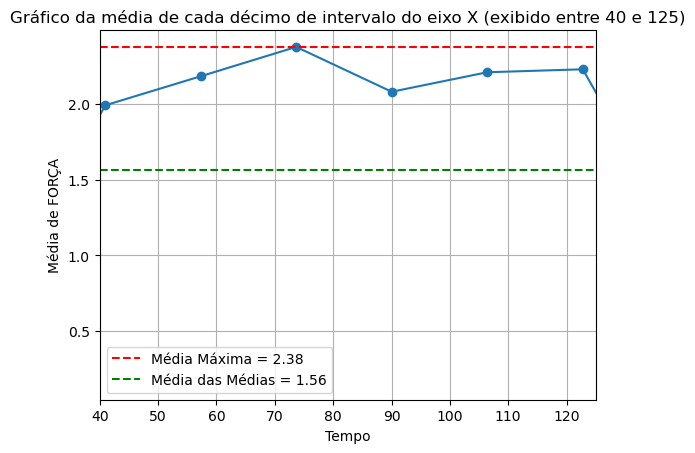

In [6]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Definir os limites do eixo X e criar 10 intervalos
x_min, x_max = x.min(), x.max()
intervalos = np.linspace(x_min, x_max, 11)

# Calcular a média de Y em cada intervalo de X
medias_y = []
centros_x = []

for i in range(len(intervalos) - 1):
    # Filtrar dados que estão dentro do intervalo atual
    mask = (x >= intervalos[i]) & (x < intervalos[i + 1])
    # Calcular a média do eixo Y para o intervalo atual
    media_y = y[mask].mean()
    # Adicionar a média e o centro do intervalo
    medias_y.append(media_y)
    centros_x.append((intervalos[i] + intervalos[i + 1]) / 2)

# Calcular a média máxima e a média das médias
media_maxima = max(medias_y)
media_das_medias = np.mean(medias_y)

# Plotar o gráfico das médias, limitando o eixo X
plt.plot(centros_x, medias_y, marker='o', linestyle='-')
plt.xlim(40, 125)  # Limitar o eixo X para valores entre 40 e 125
plt.xlabel(df.columns[0])
plt.ylabel(f"Média de {df.columns[1]}")
plt.title('Gráfico da média de cada décimo de intervalo do eixo X (exibido entre 40 e 125)')
plt.grid()

# Anotar a média máxima e a média das médias no gráfico
plt.axhline(y=media_maxima, color='r', linestyle='--', label=f'Média Máxima = {media_maxima:.2f}')
plt.axhline(y=media_das_medias, color='g', linestyle='--', label=f'Média das Médias = {media_das_medias:.2f}')

# Adicionar legenda
plt.legend()

plt.show()

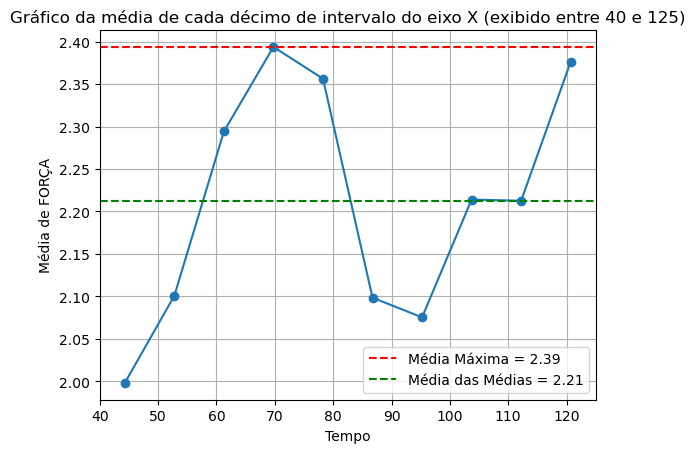

In [7]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Filtrar os dados para valores de x entre 40 e 125
mask_intervalo = (x > 40) & (x < 125)
x_filtrado = x[mask_intervalo]
y_filtrado = y[mask_intervalo]

# Definir os limites do eixo X filtrado e criar 10 intervalos
intervalos = np.linspace(x_filtrado.min(), x_filtrado.max(), 11)

# Calcular a média de Y em cada intervalo de X
medias_y = []
centros_x = []

for i in range(len(intervalos) - 1):
    # Filtrar dados que estão dentro do intervalo atual
    mask = (x >= intervalos[i]) & (x < intervalos[i + 1])
    # Calcular a média do eixo Y para o intervalo atual
    media_y = y[mask].mean()
    # Adicionar a média e o centro do intervalo
    medias_y.append(media_y)
    centros_x.append((intervalos[i] + intervalos[i + 1]) / 2)

# Calcular a média máxima e a média das médias para o intervalo filtrado
media_maxima_filtrada = max(medias_y)
media_das_medias_filtrada = np.mean(medias_y)

# Plotar o gráfico das médias, limitando o eixo X
plt.plot(centros_x, medias_y, marker='o', linestyle='-')
plt.xlim(40, 125)  # Limitar o eixo X para valores entre 40 e 125
plt.xlabel(df.columns[0])
plt.ylabel(f"Média de {df.columns[1]}")
plt.title('Gráfico da média de cada décimo de intervalo do eixo X (exibido entre 40 e 125)')
plt.grid()

# Anotar a média máxima e a média das médias filtradas no gráfico
plt.axhline(y=media_maxima_filtrada, color='r', linestyle='--', label=f'Média Máxima = {media_maxima_filtrada:.2f}')
plt.axhline(y=media_das_medias_filtrada, color='g', linestyle='--', label=f'Média das Médias = {media_das_medias_filtrada:.2f}')

# Adicionar legenda
plt.legend()

plt.show()